# Data Science and Business Analytics Intern @ The Sparks Foundation

## Author : M Sajitha 

## Task 6 : Prediction using Decision Tree Algorithm (Level - Intermediate)

## Import necessary libraries 

In [1]:
#To import and analyze data
import pandas as pd

#To perform the multi-dimensional operation
import numpy as np

#To visualize data 
import seaborn as sns

#To perform graphical plot into the context
import matplotlib.pyplot as plt

print("Libraries imported sucessfully")

Libraries imported sucessfully


## Load the dataset

In [2]:
df = pd.read_csv("Iris.csv")

print("Dataset imported sucessfully")

Dataset imported sucessfully


### To view first 5 rows of data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### To view last 5 rows of data

In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### To print a concise summary of the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### To calculate statistical data

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### To check value counts for species 

In [7]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Data visualization using pair plot

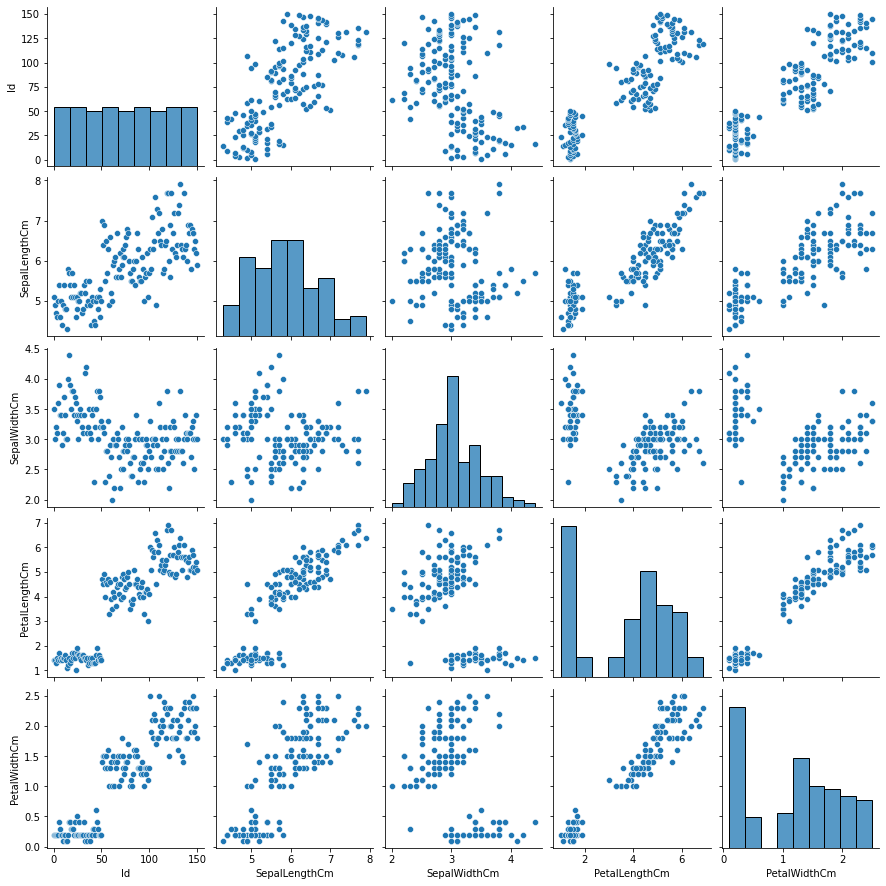

In [8]:
sns.pairplot(df)

## Train the model 

### Divide the data into attributes and labels 

In [9]:
x = df.iloc[:, 1:5]

y = df.iloc[:, -1]

### To split data into train and test sets using Scikit Learn's built-in method of train_test_split()

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 21, test_size = 0.20)

### Define and train the decision tree algorithm 

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### Predict the model 

In [12]:
pred = model.predict(x_test)

pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Print confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred))

[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]]


### Print classification report 

In [14]:
from sklearn.metrics import accuracy_score, classification_report 

print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



## Visualize the decision tree 

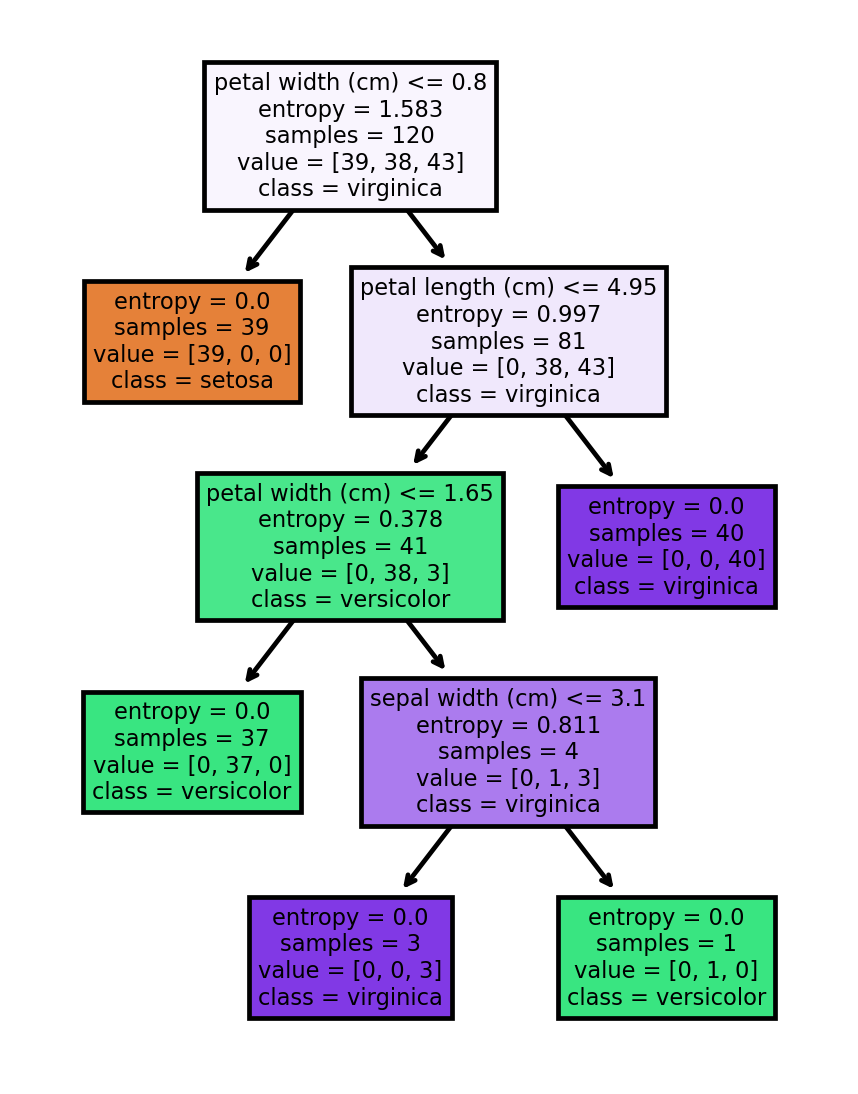

In [15]:
from sklearn import tree

feature_name=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

class_name=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,4), dpi=340)

tree.plot_tree(model,feature_names = feature_name,class_names=class_name,filled = True);

fig.savefig('tree.png')

## Evaluation Metrics 

In [16]:
import sklearn.metrics as sm

print("Accuracy:",sm.accuracy_score(y_test, pred))

Accuracy: 0.9333333333333333


## Conclusion 

### Thus, a decision tree classifier has been created and visualized graphically

# Thank you 